# Собственное непрерывное распределение


## Тема
Создание и анализ собственного распределения непрерывной случайной величины в Python


## Описание
Рассмотрим кастомное распределение с линейно убывающей плотностью на интервале [1, 4]. Для этой случайной величины X аналитически вычислим закон распределения, математическое ожидание, дисперсию, стандартное отклонение, медиану, квантиль, коэффициент асимметрии и эксцесс.


## 1. Определение функции плотности
Пусть X — случайная величина с линейно убывающей плотностью:
$$
f_X(x) = \begin{cases}
-\frac{2}{9}x + \frac{8}{9}, & 1 \le x \le 4 \\
0, & \text{иначе}
\end{cases}
$$


### Проверка нормировки
$$
\int_{1}^{4} f_X(x) dx = \int_{1}^{4} \left(-\frac{2}{9}x + \frac{8}{9}\right) dx = 1
$$


Функция распределения задается по определению через интеграл плотности:


$$
F_X(x) = \begin{cases}
0, & x < 1 \\
\int_{1}^{x} \phi(t) dt, & 1 \le x \le 4 \\
1, & x > 4
\end{cases}
$$


Интеграл на интервале 1 ≤ x ≤ 4:
$$
F_X(x) = \int_{1}^{x} \left(-\frac{2}{9}t + \frac{8}{9}\right) dt = -\frac{1}{9}x^2 + \frac{8}{9}x - \frac{7}{9}
$$


### Проверка значений на границах
$$
F_X(1) = 0, \quad F_X(4) = 1
$$

### Математическое ожидание
$$
M[X] = \int_{1}^{4} x f_X(x) dx = \int_{1}^{4} x \left(-\frac{2}{9}x + \frac{8}{9}\right) dx = 2.5
$$


### Дисперсия
$$
D[X] = \int_{1}^{4} (x - M[X])^2 f_X(x) dx = \int_{1}^{4} (x-2.5)^2 \left(-\frac{2}{9}x + \frac{8}{9}\right) dx \approx 0.4583
$$


### Стандартное отклонение
$$
\sigma[X] = \sqrt{D[X]} \approx 0.677
$$


### Медиана
$$
F_X(x_{0.5}) = 0.5 \implies x_{0.5} = 2.5
$$


### Квантили
$$
F_X(x_q) = q \implies x_q = 4 - \sqrt{16 - 9q} \quad \text{(решение квадратного уравнения)}
$$


### Коэффициент асимметрии и эксцесс
$$
\text{Ассиметрия: } A = \frac{\int_{1}^{4} (x - M[X])^3 f_X(x) dx}{\sigma^3} \approx -0.098
$$
$$
\text{Эксцесс: } E = \frac{\int_{1}^{4} (x - M[X])^4 f_X(x) dx}{\sigma^4} - 3 \approx -0.51
$$

Интеграл плотности на [1.0,4.0] = 1.000000, ошибка: 1.11e-14


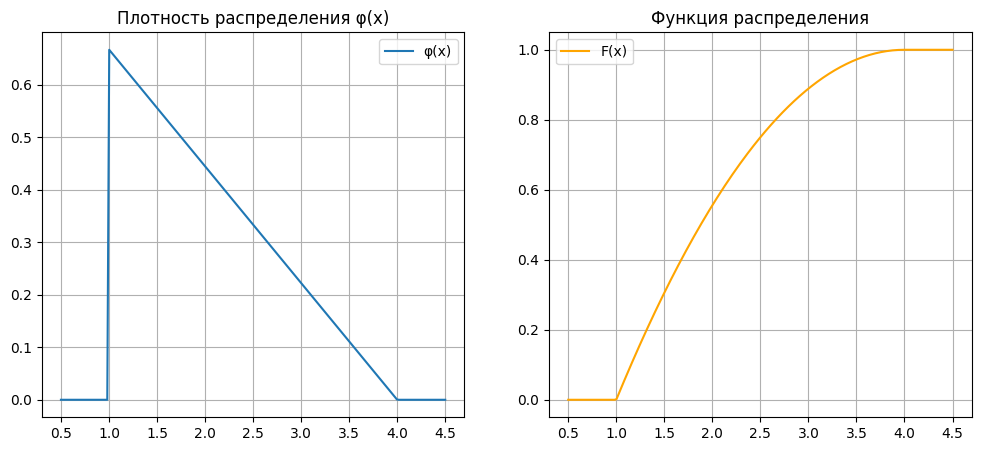

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate


class CustomDistribution(rv_continuous):
    def __init__(self, a, b):
        super().__init__(a=a, b=b, name='custom_dist')
        self.a = a
        self.b = b
    def _pdf(self, x):
        """Плотность распределения φ(x)"""
        result = np.zeros_like(x)
        result[(x >= self.a) & (x <= self.b)] = -2 * x / 9 + 8/9
        return result
    def _cdf(self, x):
        """Функция распределения с учетом трех случаев"""
        result = np.zeros_like(x, dtype=float)
        # x < a
        result[x < self.a] = 0
        # a <= x <= b
        mask = (x >= self.a) & (x <= self.b)
        for i, xi in enumerate(x[mask]):
            result[np.where(mask)[0][i]] = integrate.quad(lambda t: -2*t/9 + 8/9, self.a, xi)[0]
        # x > b
        result[x > self.b] = 1
        return result


a, b = 1.0, 4.0
custom_dist = CustomDistribution(a, b)


sample = custom_dist.rvs(size=10000)


# Проверка нормировки
integral, error = integrate.quad(custom_dist.pdf, a, b)
print(f"Интеграл плотности на [{a},{b}] = {integral:.6f}, ошибка: {error:.2e}")


# Графики
x_test = np.linspace(a-0.5, b+0.5, 200)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x_test, custom_dist.pdf(x_test), label='φ(x)')
plt.title('Плотность распределения φ(x)')
plt.grid(True)
plt.legend()


plt.subplot(1,2,2)
plt.plot(x_test, custom_dist.cdf(x_test), label='F(x)', color='orange')
plt.title('Функция распределения')
plt.grid(True)
plt.legend()
plt.show()